<a href="https://colab.research.google.com/github/DeboraOliver/StockMarket_Analysis/blob/main/Risco_de_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - risco de ações

## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


In [3]:
dataset.describe()
#o std é fundamental para medir o risco de umaação,
#mostra o quanto o preço da ação varia em relação a média

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,14.571473,32.860445,20.920034,4.634487,34.619463,71.770643
std,10.244303,16.118635,14.155955,6.023464,11.576407,19.913738
min,1.160000,6.490000,9.884610,0.030585,17.260000,36.450001
25%,6.635000,18.140224,12.640425,0.192734,28.196400,53.742500
50%,11.755000,29.105000,16.808849,2.315625,30.961201,71.090000
75%,20.355000,48.485000,19.480000,5.811485,36.226201,90.647503
max,43.790001,64.800003,83.550003,26.219999,83.720001,115.209999


## Cálculo dos retornos anuais

### 2015

In [4]:
# o  primeiro preço em 2015 eo último do ano
dataset['CVC'][dataset['Date'] == '2015-01-02'], dataset['CVC'][dataset['Date'] == '2015-12-30']

(0    15.2
 Name: CVC, dtype: float64, 245    13.5
 Name: CVC, dtype: float64)

In [5]:

#taxa de retorno de umamesma ação
np.log(13.5 / 15.2) * 100
# taxa de reorno em 2015

-11.86057424078469

In [6]:
dataset['MGLU'][dataset['Date'] == '2015-01-02'], dataset['MGLU'][dataset['Date'] == '2015-12-30']

(0    0.232812
 Name: MGLU, dtype: float64, 245    0.068945
 Name: MGLU, dtype: float64)

In [7]:
np.log(0.06 / 0.23) * 100

-134.37347467010946

### 2016

In [8]:
dataset['CVC'][dataset['Date'] == '2016-01-04'], dataset['CVC'][dataset['Date'] == '2016-12-29']

(246    12.53
 Name: CVC, dtype: float64, 494    23.700001
 Name: CVC, dtype: float64)

In [9]:
np.log(23.70 / 12.53) * 100

63.73492792331087

In [10]:
dataset['MGLU'][dataset['Date'] == '2016-01-04'], dataset['MGLU'][dataset['Date'] == '2016-12-29']

(246    0.070117
 Name: MGLU, dtype: float64, 494    0.414726
 Name: MGLU, dtype: float64)

In [11]:
np.log(0.41 / 0.07) * 100

176.76619176489942

### 2017

In [12]:
dataset['CVC'][dataset['Date'] == '2017-01-02'], dataset['CVC'][dataset['Date'] == '2017-12-29']

(495    23.02
 Name: CVC, dtype: float64, 748    48.5
 Name: CVC, dtype: float64)

In [13]:
np.log(48.50 / 23.02) * 100

74.5200394649701

In [14]:
dataset['MGLU'][dataset['Date'] == '2017-01-02'], dataset['MGLU'][dataset['Date'] == '2017-12-29']

(495    0.397304
 Name: MGLU, dtype: float64, 748    2.50688
 Name: MGLU, dtype: float64)

In [15]:
np.log(2.50 / 0.39) * 100

185.78992717326

### 2018

In [16]:
dataset['CVC'][dataset['Date'] == '2018-01-02'], dataset['CVC'][dataset['Date'] == '2018-12-28']

(749    49.880001
 Name: CVC, dtype: float64, 993    61.18
 Name: CVC, dtype: float64)

In [17]:
np.log(61.18 / 49.88) * 100

20.420021791092157

In [18]:
dataset['MGLU'][dataset['Date'] == '2018-01-02'], dataset['MGLU'][dataset['Date'] == '2018-12-28']

(749    2.47813
 Name: MGLU, dtype: float64, 993    5.65844
 Name: MGLU, dtype: float64)

In [19]:
np.log(5.65 / 2.47) * 100

82.74373945184638

### 2019

In [94]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


In [95]:
dataset['CVC'][dataset['Date'] == '2019-01-02'], dataset['CVC'][dataset['Date'] == '2019-12-30']

(994    61.099998
 Name: CVC, dtype: float64, 1240    43.799999
 Name: CVC, dtype: float64)

In [96]:
np.log(43.79 / 61.09) * 100

-33.29427058483686

In [97]:
dataset['MGLU'][dataset['Date'] == '2019-01-02'], dataset['MGLU'][dataset['Date'] == '2019-12-30']

(994    5.81219
 Name: MGLU, dtype: float64, 1240    11.925
 Name: MGLU, dtype: float64)

In [98]:
np.log(11.92 / 5.81) * 100

71.8637090773384

### 2020

In [99]:
dataset['CVC'][dataset['Date'] == '2020-01-02'], dataset['CVC'][dataset['Date'] == '2020-11-03']

(1241    44.709999
 Name: CVC, dtype: float64, 1445    12.42
 Name: CVC, dtype: float64)

In [100]:
np.log(12.42 / 44.70) * 100

-128.06654251141904

In [101]:
dataset['MGLU'][dataset['Date'] == '2020-01-02'], dataset['MGLU'][dataset['Date'] == '2020-11-03']

(1241    12.3325
 Name: MGLU, dtype: float64, 1445    25.309999
 Name: MGLU, dtype: float64)

In [102]:
np.log(25.30 / 12.33) * 100

71.87690785572217

## Variância

Quanto os dados estão variando em relação à média. Para calcular achamos a média, o desvio padrão

Nós buscamos ações por variância menor o que indicaria uma baixa volatilidade

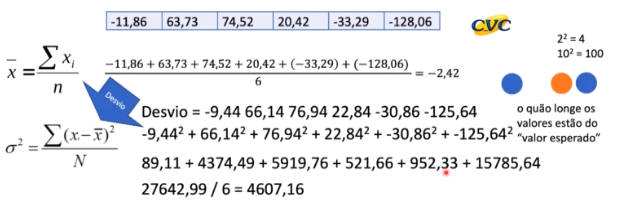

In [103]:
#vamos definir as taxas de retorno anual
taxas_cvc = np.array([-11.86, 63.73, 74.52, 20.42, -33.29, -128.06])

In [104]:
#para enconntrar a variancia primeiroencontramos a média
media_cvc = taxas_cvc.sum() / len(taxas_cvc)
media_cvc

-2.423333333333332

In [105]:
media_cvc = taxas_cvc.mean()
media_cvc

-2.423333333333332

In [106]:
# dois asterisco eleva o numero ao quadrado
((taxas_cvc - media_cvc) ** 2).sum() / len(taxas_cvc)

4607.455288888889

In [107]:
#calculo automático
variancia_cvc = taxas_cvc.var()
variancia_cvc

4607.455288888889

In [108]:
#usanso a taxa de retorno anual
taxas_mglu = np.array([-134.37, 176.76, 185.78, 82.74, 71.86, 71.87])

In [109]:
variancia_mglu = taxas_mglu.var()
variancia_mglu
#a volatilidade é maior entre 2020 e 2015 11089,84

11089.846455555555

In [110]:
#variancia dos preços nos ultimos 330 dias
dataset['CVC'].tail(330).var(), dataset['MGLU'].tail(330).var()

(259.985677904719, 28.190262814035485)

## Desvio padrão

é a raiz quadrada da variância

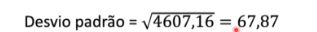

In [115]:
# a variância da taxa de retorno é o desvio padrão
desvio_padrao_cvc = math.sqrt(variancia_cvc)
desvio_padrao_cvc

67.87823869907712

In [116]:
taxas_cvc.std() #outra forma de encpntrar o desvio padrão

67.87823869907712

In [117]:
desvio_padrao_mglu = math.sqrt(variancia_mglu)
desvio_padrao_mglu
#a taxa de retorno no periodo possui uma volatilidade de 105%

105.30833991453648

In [118]:
taxas_mglu.std()

105.30833991453648

In [119]:
#analisando ospreços ao invés das taxas de retorno
dataset['CVC'].tail(330).std(), dataset['MGLU'].tail(330).std()
#sabemos quehouve uma variação para cima ou para baixo de R$

(16.124071381159258, 5.309450330687301)

## Coeficiente de variação

é o desvio padrão dividido pela média e multiplicado por 100.

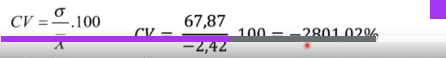

In [111]:
#precisamos do desvio  paddrão e a média
desvio_padrao_cvc, media_cvc

(67.87823869907712, -2.423333333333332)

In [112]:
#calculando manualmente
coeficiente_variacao_cvc = (desvio_padrao_cvc / media_cvc) * 100
coeficiente_variacao_cvc

-2801.0277317363334

In [113]:
#calculo automático *100  para ficar em %
stats.variation(taxas_cvc) * 100

-2801.0277317363334

In [114]:
stats.variation(taxas_mglu) * 100

138.97810124212978

## Cálculos com todas as ações - risco médio anual

In [45]:
#tirar a coluna date
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...
1441,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


In [46]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno
#retorno diário simples! Pq  são ações diferentes para comparar

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477
...,...,...,...,...,...,...
1441,-0.018987,-0.018018,0.005921,-0.000785,0.008136,-0.010024
1442,-0.090323,-0.098800,-0.049255,-0.032220,-0.035088,-0.035177
1443,-0.018321,-0.007048,0.011246,0.029639,0.036364,0.005193
1444,-0.055388,-0.031546,-0.052480,-0.028786,-0.052632,-0.024217


In [47]:
taxas_retorno.std() * 100
#calculando o  desvio padrão para cada umas das ações em %
# o menor risco seria da  bova  que tem menor std e a de maior risco seria a GOL


GOL     5.159740
CVC     3.468112
WEGE    2.217699
MGLU    4.222228
TOTS    2.997335
BOVA    1.730331
dtype: float64

In [48]:
taxas_retorno.std() * 246
#variação média anual
#o bova é a me menor risco

GOL     12.692961
CVC      8.531555
WEGE     5.455540
MGLU    10.386681
TOTS     7.373443
BOVA     4.256615
dtype: float64

In [49]:
math.sqrt(246) # Anualizar

15.684387141358123

In [50]:
taxas_retorno.std() * math.sqrt(246) #olhando anualmente
# a ação com maior risco acaba sendo a GOL

GOL     0.809274
CVC     0.543952
WEGE    0.347833
MGLU    0.662231
TOTS    0.470114
BOVA    0.271392
dtype: float64

## Correlação entre ações

In [51]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...
1441,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


In [52]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477
...,...,...,...,...,...,...
1441,-0.018987,-0.018018,0.005921,-0.000785,0.008136,-0.010024
1442,-0.090323,-0.098800,-0.049255,-0.032220,-0.035088,-0.035177
1443,-0.018321,-0.007048,0.011246,0.029639,0.036364,0.005193
1444,-0.055388,-0.031546,-0.052480,-0.028786,-0.052632,-0.024217


In [53]:
taxas_retorno.cov()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.002662,0.000895,0.000366,0.000710,0.000401,0.000528
CVC,0.000895,0.001203,0.000241,0.000479,0.000274,0.000336
WEGE,0.000366,0.000241,0.000492,0.000276,0.000199,0.000207
MGLU,0.000710,0.000479,0.000276,0.001783,0.000252,0.000335
TOTS,0.000401,0.000274,0.000199,0.000252,0.000898,0.000211
BOVA,0.000528,0.000336,0.000207,0.000335,0.000211,0.000299


In [54]:
# Empresas BOVA: http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br
taxas_retorno.corr()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,1.000000,0.499884,0.319979,0.325900,0.259048,0.590888
CVC,0.499884,1.000000,0.313461,0.327040,0.263111,0.560705
WEGE,0.319979,0.313461,1.000000,0.295261,0.299640,0.539577
MGLU,0.325900,0.327040,0.295261,1.000000,0.199397,0.458245
TOTS,0.259048,0.263111,0.299640,0.199397,1.000000,0.407193
BOVA,0.590888,0.560705,0.539577,0.458245,0.407193,1.000000


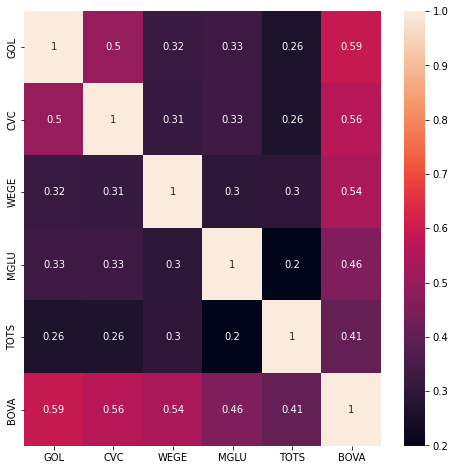

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

## Risco de um portfólio

### Somente duas ações

In [56]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477
...,...,...,...,...,...,...
1441,-0.018987,-0.018018,0.005921,-0.000785,0.008136,-0.010024
1442,-0.090323,-0.098800,-0.049255,-0.032220,-0.035088,-0.035177
1443,-0.018321,-0.007048,0.011246,0.029639,0.036364,0.005193
1444,-0.055388,-0.031546,-0.052480,-0.028786,-0.052632,-0.024217


In [57]:
taxas_retorno_gol_cvc = taxas_retorno.drop(columns = ['WEGE', 'MGLU', 'TOTS', 'BOVA'])
taxas_retorno_gol_cvc

,GOL,CVC
0,NaN,NaN
1,-0.009340,-0.013158
2,0.024242,-0.013333
3,-0.043392,-0.008784
4,-0.019244,-0.035447
...,...,...
1441,-0.018987,-0.018018
1442,-0.090323,-0.098800
1443,-0.018321,-0.007048
1444,-0.055388,-0.031546


In [58]:
taxas_retorno_gol_cvc.cov()

,GOL,CVC
GOL,0.002662,0.000895
CVC,0.000895,0.001203


In [59]:
taxas_retorno_gol_cvc.cov() * 246

,GOL,CVC
GOL,0.654924,0.220052
CVC,0.220052,0.295884


In [60]:
pesos = np.array([0.5, 0.5])

In [61]:
np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos)

array([0.43748787, 0.25796791])

In [62]:
np.dot(pesos, np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos))

0.3477278915072454

In [63]:
math.sqrt(np.dot(pesos, np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos))) * 100

58.968456950071655

### Todas as ações

In [64]:
dataset.columns

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [65]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [66]:
pesos1.sum()

1.0

In [67]:
taxas_retorno.cov() * 246

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.654924,0.220052,0.090071,0.174658,0.098555,0.129777
CVC,0.220052,0.295884,0.059308,0.117807,0.067282,0.082774
WEGE,0.090071,0.059308,0.120987,0.068012,0.048997,0.050935
MGLU,0.174658,0.117807,0.068012,0.438549,0.062077,0.082358
TOTS,0.098555,0.067282,0.048997,0.062077,0.221007,0.051952
BOVA,0.129777,0.082774,0.050935,0.082358,0.051952,0.073654


In [68]:
np.dot(taxas_retorno.cov() * 246, pesos1)

array([0.24765205, 0.15206665, 0.0774753 , 0.17222065, 0.09958374,
       0.07955904])

In [69]:
variancia_portfolio1 = np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1))
variancia_portfolio1

0.14979967843761446

In [70]:
volatilidade_portfolio1 = math.sqrt(variancia_portfolio1)
volatilidade_portfolio1

0.38703963419476106

In [71]:
pesos2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

In [72]:
variancia_portfolio2 = np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2))
variancia_portfolio2

0.07365354752228817

In [73]:
volatilidade_portfolio2 = math.sqrt(variancia_portfolio2)
volatilidade_portfolio2

0.27139187077414123

## Risco sistemático e não sistemático

- Risco sistemático: mudança diária no preço das ações, devido a eventos como recessão da economia, comportamento do cliente (eventos externos). Não pode ser eliminado e pode afetar todas as empresas
- Risco não sistemático: Eventos específicos na empresa (depende do tipo de empresa)

In [74]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477
...,...,...,...,...,...,...
1441,-0.018987,-0.018018,0.005921,-0.000785,0.008136,-0.010024
1442,-0.090323,-0.098800,-0.049255,-0.032220,-0.035088,-0.035177
1443,-0.018321,-0.007048,0.011246,0.029639,0.036364,0.005193
1444,-0.055388,-0.031546,-0.052480,-0.028786,-0.052632,-0.024217


In [75]:
pesos1

array([0.2, 0.2, 0.2, 0.2, 0.2, 0. ])

In [76]:
pesos2

array([0., 0., 0., 0., 0., 1.])

In [77]:
taxas_retorno.var() * 246

GOL     0.654924
CVC     0.295884
WEGE    0.120987
MGLU    0.438549
TOTS    0.221007
BOVA    0.073654
dtype: float64

In [78]:
variancia_pesos1 = (taxas_retorno.var() * 246) * pesos1
variancia_pesos1

GOL     0.130985
CVC     0.059177
WEGE    0.024197
MGLU    0.087710
TOTS    0.044201
BOVA    0.000000
dtype: float64

In [79]:
sub1 = - variancia_pesos1[0] - variancia_pesos1[1] - variancia_pesos1[2] - variancia_pesos1[3] - variancia_pesos1[4] - variancia_pesos1[5] #Atualizado: 02/05/2021
sub1

-0.34627025459782085

In [80]:
variancia_portfolio1

0.14979967843761446

In [81]:
risco_nao_sistematico1 = (variancia_portfolio1 - sub1)
risco_nao_sistematico1

0.49606993303543534

In [82]:
variancia_pesos2 = (taxas_retorno.var() * 246) * pesos2
variancia_pesos2

GOL     0.000000
CVC     0.000000
WEGE    0.000000
MGLU    0.000000
TOTS    0.000000
BOVA    0.073654
dtype: float64

In [83]:
sub2 = variancia_pesos2[0] - variancia_pesos2[1] - variancia_pesos2[2] - variancia_pesos2[3] - variancia_pesos2[4] - variancia_pesos2[5]
sub2

-0.07365354752228802

In [84]:
variancia_portfolio2

0.07365354752228817

In [85]:
risco_nao_sistematico2 = (variancia_portfolio2 - sub2)
risco_nao_sistematico2

0.14730709504457618

## Exercício

In [86]:
dataset = pd.read_csv('acoes_ex.csv')
dataset

FileNotFoundError: ignored

In [ ]:
dataset.drop(labels=['Date'], axis = 1, inplace = True)
dataset.head()

In [ ]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

In [ ]:
# Empresas BOVA: http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

In [ ]:
taxas_retorno.std() * math.sqrt(246) # Anualizado

In [ ]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [ ]:
variancia_portfolio1 = np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1))
variancia_portfolio1

In [ ]:
volatidade_portfolio1 = math.sqrt(np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1)))
volatidade_portfolio1

In [ ]:
variancia_acoes1 = (taxas_retorno.var() * 246) * pesos1
sub = variancia_acoes1[0] - variancia_acoes1[1] - variancia_acoes1[2] - variancia_acoes1[3] - variancia_acoes1[4] - variancia_acoes1[5] 
risco_nao_sistematico1 = (variancia_portfolio1 - sub)
risco_nao_sistematico1

In [ ]:
pesos2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

In [ ]:
variancia_portfolio2 = np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2))
variancia_portfolio2

In [ ]:
volatidade_portfolio2 = math.sqrt(np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2)))
volatidade_portfolio2

In [ ]:
variancia_acoes2 = (taxas_retorno.var() * 246) * pesos2
sub = variancia_acoes2[0] - variancia_acoes2[1] - variancia_acoes2[2] - variancia_acoes2[3] - variancia_acoes2[4] - variancia_acoes2[5] 
risco_nao_sistematico2 = (variancia_portfolio2 - sub)
risco_nao_sistematico2